In [1]:
from matplotlib import pyplot as plt #graphing
import matplotlib.colors as mcolors #colors
import seaborn as sns #for second question
import pandas #dataframes, easy manipulation
import random #for random color generation
import numpy #numpy module


In [2]:
dataframe = pandas.read_csv(r"C:\Users\ballc\OneDrive\Documents\Desktop\data analytics project 1\data.csv", dtype = {"Local Case Number": "string"}) #data is imported and Local Case Number is made a string to prevent mixed data types

In [3]:
print(f"[!] Before any data cleaning, there are {len(dataframe.index)} rows in the dataframe.")

[!] Before any data cleaning, there are 184175 rows in the dataframe.


In [4]:
#data cleaning

#drop duplicates by looking at the case number
dataframe = dataframe.drop_duplicates("Local Case Number")

In [5]:
print(f"[!] After dropping duplicates based on the Local Case Number column, there are {len(dataframe.index)} rows.")

[!] After dropping duplicates based on the Local Case Number column, there are 103599 rows.


In [6]:
#drop unwanted columns
unwanted_columns = ['Report Number', 'Agency Name', 'Drivers License State', 'Local Case Number', 'ACRS Report Type', 'Vehicle ID', 'Crash Date/Time', 'Driverless Vehicle', 'Speed Limit', 'Vehicle Going Dir', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Person ID',
                                'Vehicle First Impact Location', 'Parked Vehicle', 'Latitude', 'Longitude', 'Location', 'Vehicle Body Type', 'Vehicle Year', 'Weather', 'Surface Condition', 'Light',
                                    'Traffic Control', 'Driver Substance Abuse', 'Circumstance', 'Driver Distracted By', 'Vehicle Movement']

In [7]:
dataframe = dataframe.drop(unwanted_columns, axis = 1)

In [8]:
print(f"[!] {len(unwanted_columns)} unwanted columns have been removed.")

[!] 32 unwanted columns have been removed.


In [9]:
#drop any null/NaN/blank values
dataframe = dataframe.dropna(how = 'any', axis = 0)

In [10]:
print(f"[!] After dropping rows that contain ANY null value (N/A, null, None, NaN, 0, unknown), there are {len(dataframe.index)} rows.")

[!] After dropping rows that contain ANY null value (N/A, null, None, NaN, 0, unknown), there are 4400 rows.


In [11]:
#make everything lowercase since nothing needs to be case sensitive
for column in dataframe.columns:
    dataframe[column] = dataframe[column].str.lower()

In [12]:
#drop any rows where the Vehicle Damage Extent column has a value of "other", "unknown"
dataframe = dataframe[dataframe['Vehicle Damage Extent'] != "other"]

In [13]:
#drop any rows where the Vehicle Damage Extent column has a value of "UNKNOWN"
dataframe = dataframe[dataframe['Vehicle Damage Extent'] != "unknown"]

In [14]:
#drop any rows where the Vehicle Model column has a value of "unknown"
dataframe = dataframe[dataframe['Vehicle Model'] != "unknown"]

In [15]:
#combine column Vehicle Make & Vehicle Model to make column Vehicle
dataframe['Vehicle'] = dataframe['Vehicle Make'] + " " + dataframe['Vehicle Model']


In [16]:
#First Question Begins Here

#this will show how many types of injuries and types of vehicle damages each car model has had
damage_counts = dataframe.groupby(['Vehicle', 'Vehicle Damage Extent']).size().unstack(fill_value = 0)

In [17]:
filtered = damage_counts.nlargest(10, columns = "no damage")
print(filtered)

Vehicle Damage Extent  destroyed  disabling  functional  no damage  \
Vehicle                                                              
toyota camry                   0          8          22         44   
honda civic                    0          9          25         43   
toyota corolla                 0          7          23         43   
honda accord                   0          8          22         30   
toyota prius                   0          3           9         27   
toyt 4s                        0          2           5         27   
honda pilot                    0          2           9         25   
toyota rav4                    1          3           9         24   
honda crv                      0          0           8         23   
ford explorer                  0          0           1         22   

Vehicle Damage Extent  superficial  vehicle not at scene  
Vehicle                                                   
toyota camry                    63       

In [18]:
print("[!] These percentages will not add up to 100% due to superficial being left out. These are also rounded to the nearest whole number.")


[!] These percentages will not add up to 100% due to superficial being left out. These are also rounded to the nearest whole number.


In [19]:
for x in range(len(filtered.index)):
    row = filtered.iloc[x]
    total = row['destroyed'] + row['disabling'] + row['functional'] + row['no damage'] + row['superficial'] + row['vehicle not at scene']
    print(f"{row.name} has {total} total collisions.\n{round(row['destroyed'] / total * 100)}% are destroyed\n{round(row['disabling'] / total * 100)}% are disabling\n{round(row['functional'] / total * 100)}% are functional\n{round(row['no damage'] / total * 100)}% are no damage\n{round(row['vehicle not at scene'] / total * 100)}% are vehicle not at scene")


toyota camry has 138 total collisions.
0% are destroyed
6% are disabling
16% are functional
32% are no damage
1% are vehicle not at scene
honda civic has 125 total collisions.
0% are destroyed
7% are disabling
20% are functional
34% are no damage
0% are vehicle not at scene
toyota corolla has 119 total collisions.
0% are destroyed
6% are disabling
19% are functional
36% are no damage
1% are vehicle not at scene
honda accord has 101 total collisions.
0% are destroyed
8% are disabling
22% are functional
30% are no damage
1% are vehicle not at scene
toyota prius has 61 total collisions.
0% are destroyed
5% are disabling
15% are functional
44% are no damage
2% are vehicle not at scene
toyt 4s has 57 total collisions.
0% are destroyed
4% are disabling
9% are functional
47% are no damage
0% are vehicle not at scene
honda pilot has 50 total collisions.
0% are destroyed
4% are disabling
18% are functional
50% are no damage
0% are vehicle not at scene
toyota rav4 has 66 total collisions.
2% are

In [20]:
width = 10

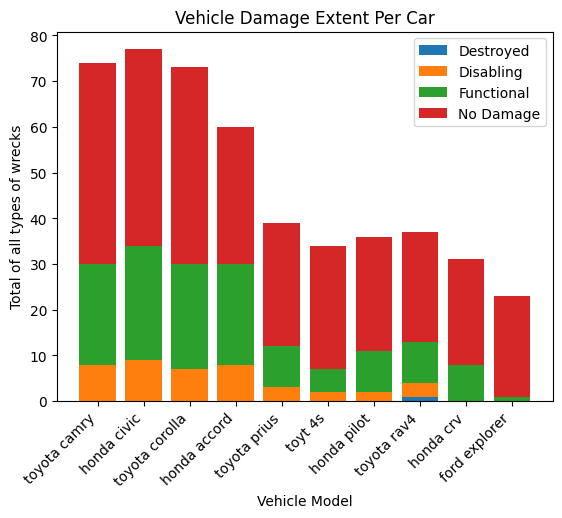

In [21]:
fig, ax = plt.subplots()
ax.bar(filtered.index, filtered['destroyed'], label='Destroyed')
ax.bar(filtered.index, filtered['disabling'], bottom=filtered['destroyed'], label='Disabling')
ax.bar(filtered.index, filtered['functional'], bottom=filtered['destroyed'] + filtered['disabling'], label='Functional')
ax.bar(filtered.index, filtered['no damage'], bottom=filtered['destroyed'] + filtered['disabling'] + filtered['functional'], label='No Damage')

ax.set_title("Vehicle Damage Extent Per Car")
ax.set_xlabel("Vehicle Model")
plt.xticks(rotation = 45, ha = 'right')
ax.set_ylabel("Total of all types of wrecks")
ax.legend()
plt.show()

In [22]:
#Second Question Begins Here
injury_counts = dataframe.groupby(['Vehicle', 'Injury Severity']).size().unstack(fill_value = 0)

In [23]:
filtered_two = injury_counts.nlargest(10, columns = "no apparent injury")


In [24]:
print(filtered_two)


Injury Severity    no apparent injury  possible injury  \
Vehicle                                                  
toyota camry                      134                1   
honda civic                       121                2   
toyota corolla                    119                0   
honda accord                       96                1   
toyota rav4                        64                1   
toyota prius                       61                0   
toyt 4s                            56                0   
toyota highlander                  53                0   
nissan altima                      51                2   
toyota sienna                      50                1   

Injury Severity    suspected minor injury  suspected serious injury  
Vehicle                                                              
toyota camry                            3                         0  
honda civic                             2                         0  
toyota corolla         

In [25]:
for x in range(len(filtered_two.index)):
    row = filtered_two.iloc[x]
    total = row['no apparent injury'] + row['possible injury'] + row['suspected minor injury'] + row['suspected serious injury']
    print(f"{row.name} has {total} total injuries.\n{round(row['no apparent injury'] / total * 100)}% are no apparent injury\n{round(row['possible injury'] / total * 100)}% are possible injury\n{round(row['suspected minor injury'] / total * 100)}% are suspected minor injury\n{round(row['suspected serious injury'] / total * 100)}% are suspected serious injury\n")


toyota camry has 138 total injuries.
97% are no apparent injury
1% are possible injury
2% are suspected minor injury
0% are suspected serious injury

honda civic has 125 total injuries.
97% are no apparent injury
2% are possible injury
2% are suspected minor injury
0% are suspected serious injury

toyota corolla has 119 total injuries.
100% are no apparent injury
0% are possible injury
0% are suspected minor injury
0% are suspected serious injury

honda accord has 101 total injuries.
95% are no apparent injury
1% are possible injury
4% are suspected minor injury
0% are suspected serious injury

toyota rav4 has 66 total injuries.
97% are no apparent injury
2% are possible injury
2% are suspected minor injury
0% are suspected serious injury

toyota prius has 61 total injuries.
100% are no apparent injury
0% are possible injury
0% are suspected minor injury
0% are suspected serious injury

toyt 4s has 57 total injuries.
98% are no apparent injury
0% are possible injury
2% are suspected mi

In [26]:
values = filtered_two.loc[:, 'no apparent injury']

In [27]:
colors = [random.choice(list(mcolors.CSS4_COLORS.values())) for _ in range(10)]

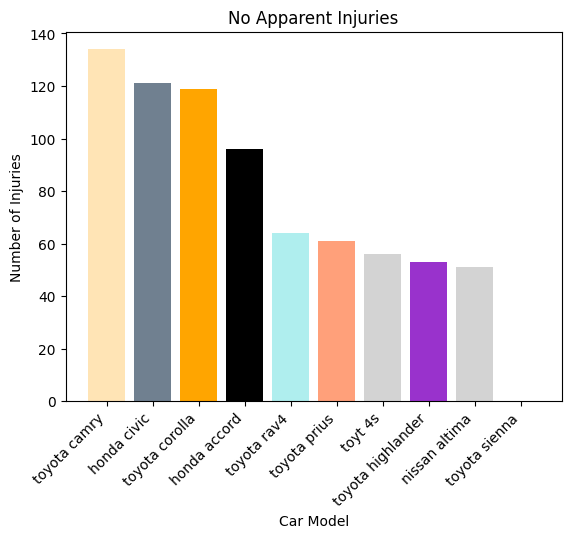

In [28]:
plt.xticks(rotation = 45, ha = 'right')
plt.title("No Apparent Injuries")
plt.ylabel("Number of Injuries")
plt.xlabel("Car Model")
plt.bar(filtered_two.index, values, color = colors)
plt.show()


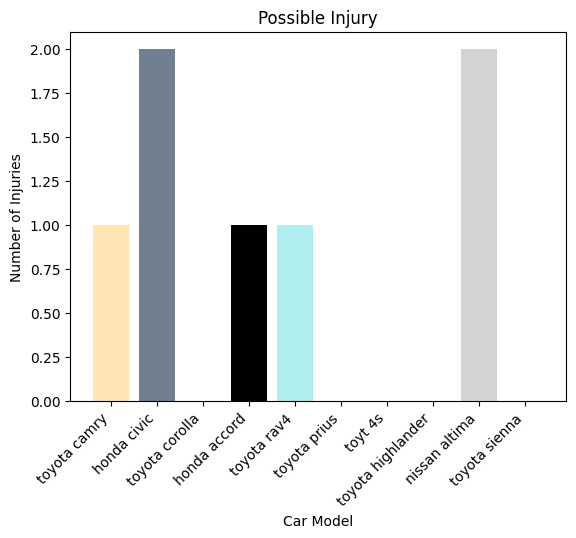

In [29]:
values = filtered_two.loc[:, 'possible injury']
plt.xticks(rotation = 45, ha = 'right')
plt.title("Possible Injury")
plt.ylabel("Number of Injuries")
plt.xlabel("Car Model")
plt.bar(filtered_two.index, values, color = colors)
plt.show()


In [30]:
#Third Question Begins Here

In [31]:
no_injury = filtered_two['no apparent injury']
no_damage = filtered['no damage']

In [32]:
dataframe_three = pandas.DataFrame({'no injury': no_injury, 'no_damage': no_damage}, index = filtered.index)


In [33]:
#since there are some cars that are in the top 10 for injury, but different top 10 for damage, drop the ones that are not in both. These are denoted by the "NaN"
dataframe_three = dataframe_three.dropna(how = 'any', axis = 0)

In [34]:
print(dataframe_three)


                no injury  no_damage
Vehicle                             
toyota camry        134.0         44
honda civic         121.0         43
toyota corolla      119.0         43
honda accord         96.0         30
toyota prius         61.0         27
toyt 4s              56.0         27
toyota rav4          64.0         24


In [35]:
data = {
    'Vehicle': dataframe_three.index.values.tolist(),
    'no_injury': dataframe_three['no injury'].tolist(),
    'no_damage': dataframe_three['no_damage'].tolist()
}


In [36]:
frame = pandas.DataFrame(data)


In [37]:
# Melt the DataFrame to long format, which will make it usable as a grouped bar chart
dataframe_melted = frame.melt(id_vars = 'Vehicle', var_name = 'Category', value_name = 'Count')

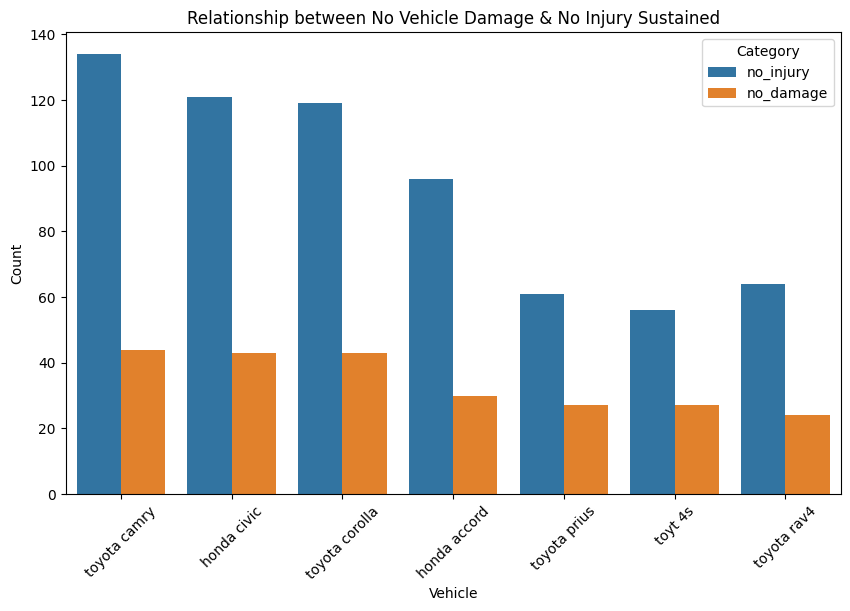

In [38]:
# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Vehicle', y = 'Count', hue = 'Category', data = dataframe_melted)
#rotate so names are seeable
plt.xticks(rotation = 45)
plt.title('Relationship between No Vehicle Damage & No Injury Sustained')
plt.show()